# Time Series Forecasting

Developing a time series predicting model involves forecasting the future needs historical time-ordered data.


## ---> RNNs(Recurrent Neural Network) should be used for this problem

## So first off the bat, What is RNN?

##### RNN is a type of Neural Network where the output from the previous step is fed into the current step. In traditional Neural Network, all the inputs and outputs are independent of each other, however, the thing is, when the data is in sequential order, for example, predict the next word in a sentence, all the previous words are required(context) -----> We need RNN, which can handle context since it can remember the previous word because the previous word is needed for generating the current needed word!

##### The main feature of RNN is its memory state or hidden state, which remembers some information about a sequence. It uses the same parameter for each input as it performs the exact same task on all inputs or hidden layers to produce the output. This would reduce complexity of the network

## And how RNN works?

##### RNN has multiple fixed activation function units, one for each step. And each unit has a hidden state. This hidden state basically conveys the past information that the network currently holds at a given time step. This state is UPDATED at EVEYRY TIME STEP to signify the CHANGE in information about the past

## How we train RNN?




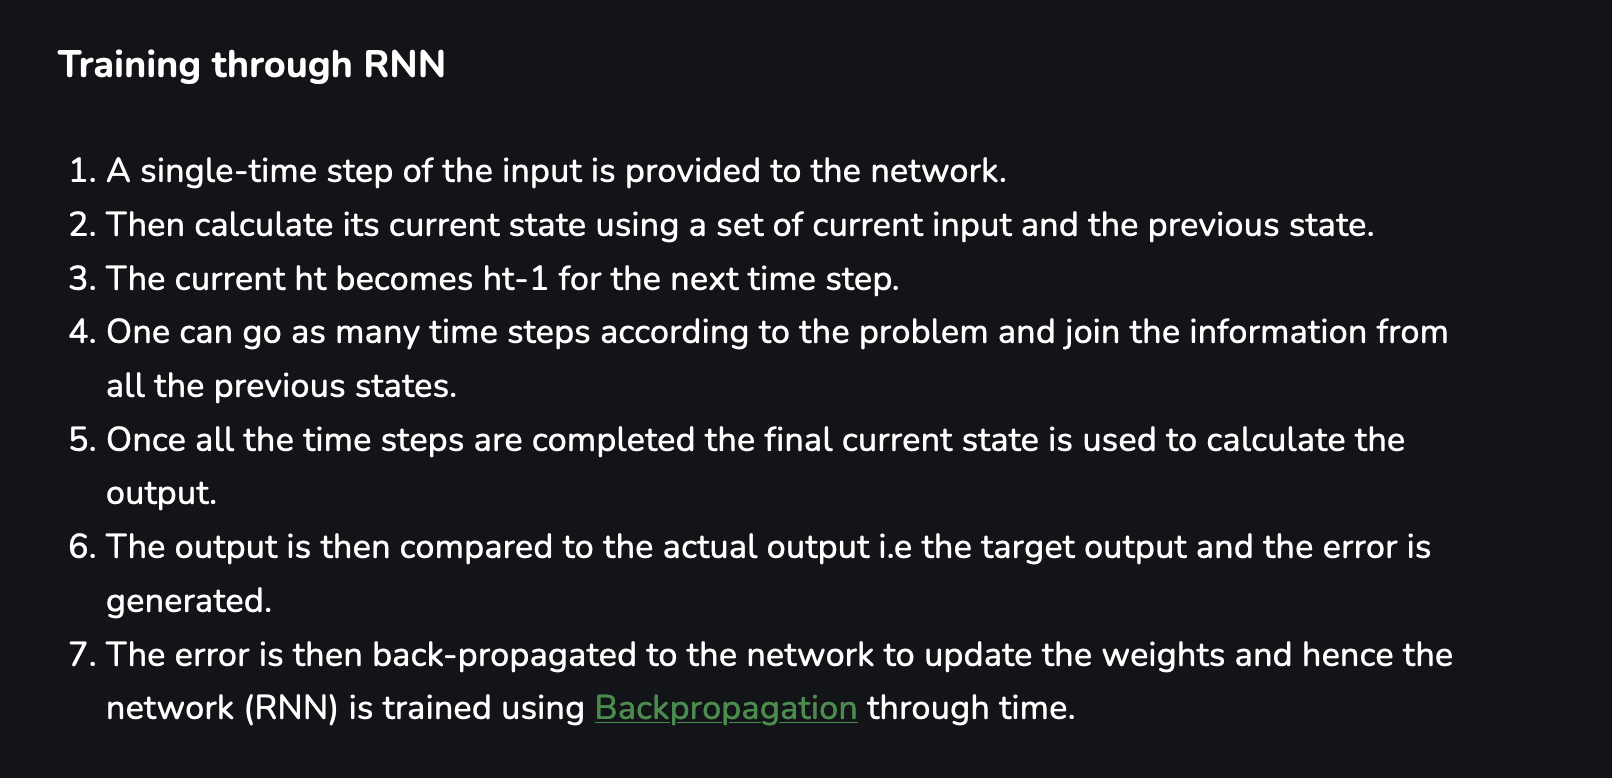




### After fundamentally understand what RNN is, we need to go into the problem. Like other machine learning problem, the first thing we need about the time series forecasting is **DATA**.


 Yahoo ---> yfinance

In [1]:
# importing libraries

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import yfinance as yf
tf.random.set_seed(10)

In [3]:
#here i download it from yfinance
meta_df = yf.download(tickers=['META'], period='4y')

[*********************100%%**********************]  1 of 1 completed


In [4]:
meta_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-25,199.520004,200.970001,199.250000,199.789993,199.789993,15272300
2019-11-26,200.000000,200.149994,198.039993,198.970001,198.970001,11735500
2019-11-27,199.899994,203.139999,199.419998,202.000000,202.000000,12736600
2019-11-29,201.600006,203.800003,201.210007,201.639999,201.639999,7985200
2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
...,...,...,...,...,...,...
2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600
2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400
2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500


## So we see Yahoo pretty much provided us with the data that we need for this problem, without any missing values, so we dig a little deeper into

## The data i got from yfinance for meta looks very solid, now lets evaluate it

In [5]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2019-11-25 to 2023-11-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [6]:
meta_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,245.809861,249.490755,242.409672,245.975776,245.975776,2.517948e+07
std,69.983601,70.321872,69.448375,69.908339,69.908339,1.643375e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,194.000004,197.180004,189.012505,193.564995,193.564995,1.622922e+07
50%,249.219994,253.715004,246.904999,249.370003,249.370003,2.141650e+07
75%,304.242508,308.510002,300.082504,304.582504,304.582504,2.916998e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


In [7]:
#so we need to plot the graph over the time(every day) in the data to see the changes in closing price

def plotting_change_over_time(crypto_data, crypto_name):
    plt.figure(figsize=(12, 6))
    plt.plot(crypto_data.index, crypto_data['Close'], label='Closing Price')
    plt.title( crypto_name + ' graph change over time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()



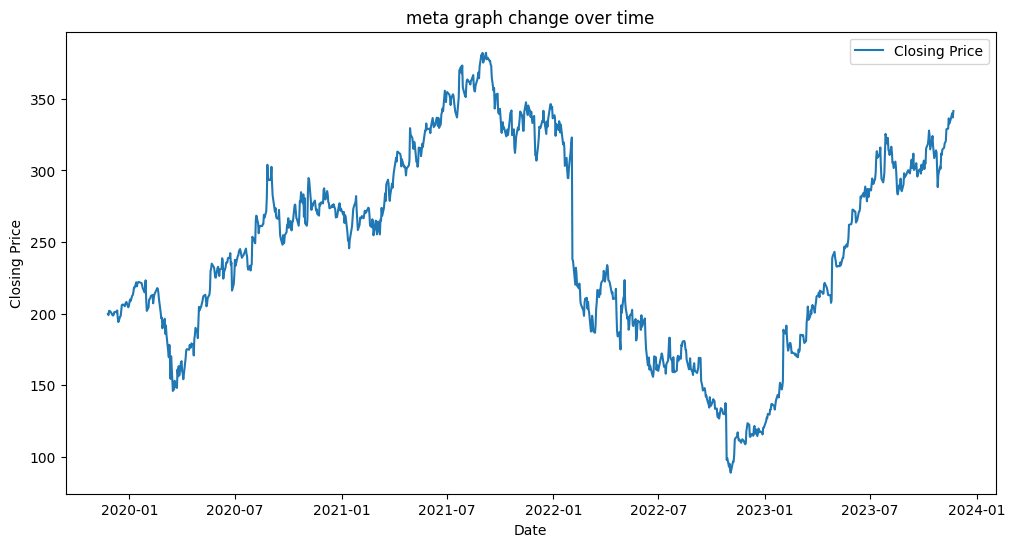

In [8]:
plotting_change_over_time(meta_df, "meta")

In [9]:
# Oh its time to check for missing values and outliers

print("meta missing values: ")
print(meta_df.isnull().sum())


# -----> Okay we see that yahoo data is totally okay, and accurate


# no missing values, but lets just plot it!

meta missing values: 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<Axes: ylabel='Date'>

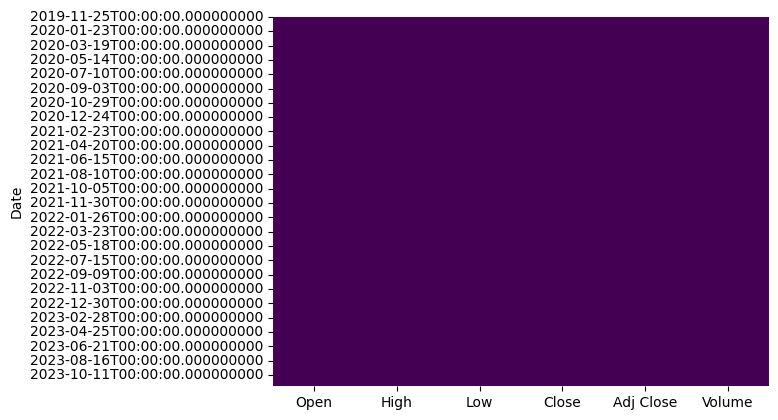

In [10]:
# visualize missing value
#before doing so, lets import some libraries

import seaborn as sns

# we use seaborn heatmap for visualizing missing values because i think heatmap
# is very good for plotting missing values

sns.heatmap(meta_df.isnull(), cbar=False, cmap='viridis')


#we see from 2014->2023, the data is totally clean

In [11]:
#lets check if theres any outliers

def graph_outlier(crypto_data, crypto_name):

  plt.figure(figsize=(10, 6))
  crypto_data.boxplot(column=['Open', 'High', 'Low', 'Close', 'Adj Close'])
  plt.title(f'Boxplot of {crypto_name} Price Columns')
  plt.show()


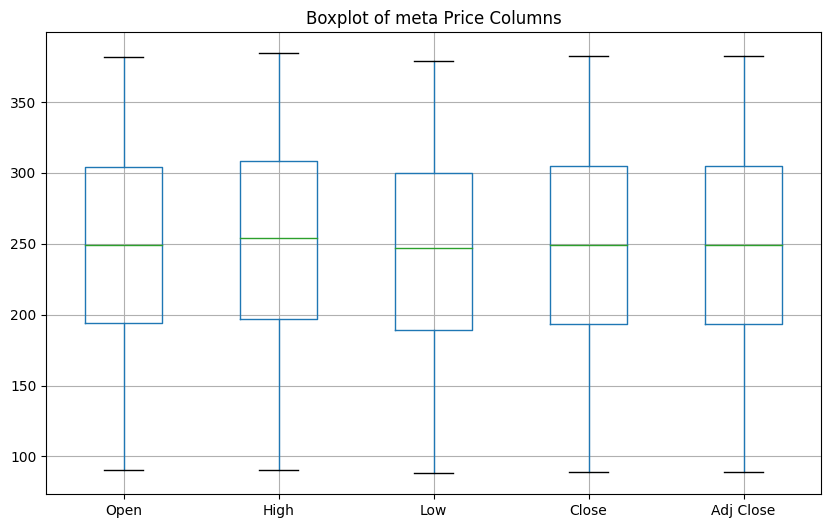

In [12]:
graph_outlier(meta_df, 'meta')

# there are some fluctuations here and there, but i dont think theres any serious outliers here

In [13]:
meta_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-25,199.520004,200.970001,199.250000,199.789993,199.789993,15272300
2019-11-26,200.000000,200.149994,198.039993,198.970001,198.970001,11735500
2019-11-27,199.899994,203.139999,199.419998,202.000000,202.000000,12736600
2019-11-29,201.600006,203.800003,201.210007,201.639999,201.639999,7985200
2019-12-02,202.130005,202.179993,198.050003,199.699997,199.699997,11503400
...,...,...,...,...,...,...
2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600
2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400
2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500


I think data might be ready for training model? Do we need to limit the meta data to be only between 2017-11-9 and 2023-12-11 because having COMMON TIME PERIOD is beneficial during model training. So now lets just start with not having a common time period! if anything goes wrong with the model, i will come back into the data to limit the time period!

# Creating the model

After getting the data we need, we only need Date and Close price


In [14]:
#lets just get the close price for the sake of simplicity
meta_data = meta_df['Close'].fillna(method='ffill')
meta_dataset = meta_data.values.reshape(-1, 1)

print(meta_dataset) #meta_dataset has the price of everything

print('length of meta_dataset: ', len(meta_dataset))

[[199.78999329]
 [198.97000122]
 [202.        ]
 ...
 [339.97000122]
 [336.98001099]
 [341.48999023]]
length of meta_dataset:  1006


In [15]:
meta_training_data_len = math.ceil(len(meta_dataset) * .8)

meta_training_data_len

805

## The next step is to normalise the data

In LSTM, we use MinMaxScaler to normalise the data into the range 0,1

In [16]:
#scaling using minmaxscaler
#here we normalise the feature into the range 0-1
#the reason why we normalise the feature is because it would make the
#model learn much more effective without having biases

scaler = MinMaxScaler(feature_range=(0,1))

scaler = scaler.fit(meta_dataset)

meta_dataset = scaler.transform(meta_dataset)


In [17]:
meta_dataset #after scaling the meta_dataset would be between 0-1

array([[0.37808161],
       [0.37528558],
       [0.38561735],
       ...,
       [0.85607122],
       [0.84587587],
       [0.86125412]])

# I want our model to predict 60 days in the future and i would require 120 days as input

In [18]:
#now we generate
n_lookback = 120 #len of input sequences
n_forecast = 60 #len of prediction


meta_X = []
meta_Y = []

for i in range(n_lookback, len(meta_dataset) - n_forecast + 1):
    meta_X.append(meta_dataset[i - n_lookback: i])
    meta_Y.append(meta_dataset[i: i + n_forecast])

print(len(meta_X))
print(len(meta_Y))



827
827


In [19]:
meta_X = np.array(meta_X)
meta_Y = np.array(meta_Y)

#tensorflow supports numpy array so we turn them into arrays

In [20]:
print(meta_X.shape)
print(meta_Y.shape)

(827, 120, 1)
(827, 60, 1)


In [21]:
#now lets create the model

meta_model = Sequential()
meta_model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
meta_model.add(LSTM(units=50))
meta_model.add(Dense(n_forecast))

# adam = Adam(learning_rate = 5e-3)
meta_model.compile(loss='mean_squared_error', optimizer='adam')


# Now lets splitting our data into train and test

In [22]:
print(meta_X.shape)
print(meta_Y.shape)

(827, 120, 1)
(827, 60, 1)


In [23]:
meta_training_size = int(meta_X.shape[0] * 0.8)
meta_training_size

661

In [24]:
meta_X_train, meta_y_train = meta_X[:meta_training_size], meta_Y[:meta_training_size]
meta_X_test, meta_y_test = meta_X[meta_training_size:], meta_Y[meta_training_size: ]

In [25]:
#now lets use the model

history = meta_model.fit(meta_X_train, meta_y_train,
                            epochs = 100,
                            batch_size = 32,
                            validation_data = (meta_X_test, meta_y_test))

Epoch 1/100
21/21 [==============================] - 11s 136ms/step - loss: 0.2077 - val_loss: 0.0592
Epoch 2/100
21/21 [==============================] - 1s 46ms/step - loss: 0.0433 - val_loss: 0.0283
Epoch 3/100
21/21 [==============================] - 1s 39ms/step - loss: 0.0184 - val_loss: 0.0364
Epoch 4/100
21/21 [==============================] - 1s 46ms/step - loss: 0.0166 - val_loss: 0.0288
Epoch 5/100
21/21 [==============================] - 1s 40ms/step - loss: 0.0167 - val_loss: 0.0411
Epoch 6/100
21/21 [==============================] - 1s 39ms/step - loss: 0.0176 - val_loss: 0.0260
Epoch 7/100
21/21 [==============================] - 1s 37ms/step - loss: 0.0158 - val_loss: 0.0287
Epoch 8/100
21/21 [==============================] - 1s 35ms/step - loss: 0.0159 - val_loss: 0.0403
Epoch 9/100
21/21 [==============================] - 1s 27ms/step - loss: 0.0165 - val_loss: 0.0215
Epoch 10/100
21/21 [==============================] - 1s 29ms/step - loss: 0.0161 - val_loss: 0.02

In [26]:
def plotLossGraph(history):
  historyForPlot = pd.DataFrame(history.history)
  historyForPlot.index+=1
  historyForPlot.plot()

  plt.ylabel('loss')
  plt.xlabel('epochs')

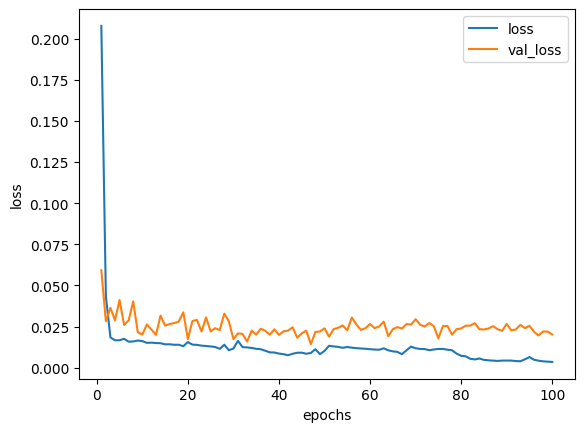

In [27]:
plotLossGraph(history)

#Generate forecasts

In [28]:
meta_lookback = meta_dataset[-n_lookback:]

meta_lookback = meta_lookback.reshape(1, n_lookback, 1)


In [29]:
meta_forecast = meta_model.predict(meta_lookback)
meta_forecast = scaler.inverse_transform(meta_forecast)

1/1 [==============================] - 1s 619ms/step


In [30]:
meta_forecast

array([[344.01355, 344.76746, 338.2945 , 346.9146 , 344.67285, 346.66385,
        345.54422, 346.65674, 345.8985 , 345.73465, 345.52454, 345.35376,
        340.3719 , 352.02652, 350.63254, 348.95584, 348.35605, 348.22464,
        349.52292, 350.9415 , 352.5383 , 357.1854 , 351.70004, 352.59796,
        356.62454, 356.3205 , 354.70587, 351.0378 , 357.54944, 354.29178,
        354.23148, 361.06906, 352.88623, 355.47556, 355.29346, 359.1631 ,
        358.49088, 360.76523, 356.6054 , 361.6989 , 361.46033, 358.87524,
        354.9882 , 354.0593 , 355.36914, 360.69275, 355.93793, 358.81238,
        355.3356 , 361.00034, 358.805  , 353.2102 , 352.39786, 352.9446 ,
        355.0284 , 352.95612, 359.47736, 347.0608 , 349.7635 , 353.63168]],
      dtype=float32)

In [31]:
import plotly.graph_objects as go

In [32]:

meta_past = meta_df[['Close']][-180:].reset_index()
meta_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
meta_past['Date'] = pd.to_datetime(meta_past['Date'])
meta_past['Forecast'] = np.nan
meta_past['Forecast'].iloc[-1] = meta_past['Actual'].iloc[-1]


meta_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
meta_future['Date'] = pd.date_range(start=meta_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
meta_future['Forecast'] = meta_forecast.flatten()
meta_future['Actual'] = np.nan

# results = meta_past.append(meta_future).set_index('Date')

results = pd.concat([meta_past, meta_future]).set_index('Date')


fig = px.line(results, x=results.index, y=['Actual', 'Forecast'], title='Meta Forecasting in 2 months')
fig.add_shape(
    go.layout.Shape(
        type="line",
        x0=results.index[-n_forecast], y0=results['Actual'].min(),
        x1=results.index[-n_forecast], y1=results['Actual'].max(),
        line=dict(color="red", width=1, dash="dash")
    )
)
fig.show()


<ipython-input-32-b49eda255c98>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_past['Forecast'].iloc[-1] = meta_past['Actual'].iloc[-1]


In [33]:
results.tail(n_forecast)

,Actual,Forecast
Date,,
2023-11-23,NaN,344.013550
2023-11-24,NaN,344.767456
2023-11-25,NaN,338.294495
2023-11-26,NaN,346.914612
2023-11-27,NaN,344.672852
2023-11-28,NaN,346.663849
2023-11-29,NaN,345.544220
2023-11-30,NaN,346.656738
2023-12-01,NaN,345.898499


In [34]:
results.shape
print("Price of meta on", results.index[-n_forecast], "should be ",results.Forecast[-n_forecast])

#as of right now 23 Nov 22:33, the result is rather decent

Price of meta on 2023-11-23 00:00:00 should be  344.0135498046875


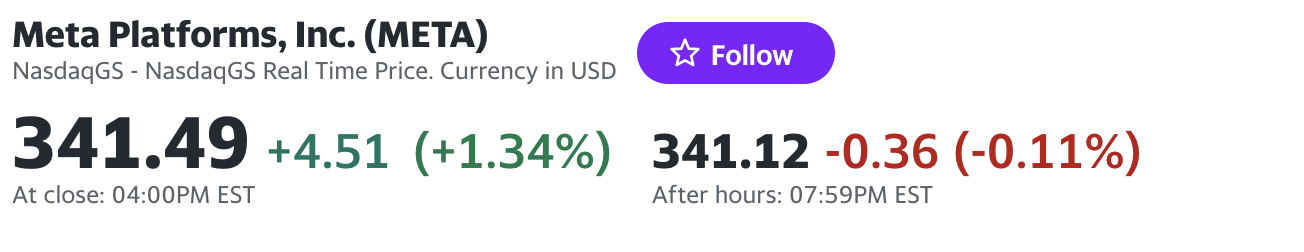

In [35]:
meta_model.save('meta.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [ ]:
meta_df.Volume[-1]

10702700

# Lets do the same for another type of stock/currency

In [36]:
microsoft_df = yf.download(tickers=['MSFT'], period='4y')


microsoft_df

tf.random.set_seed(10)

[*********************100%%**********************]  1 of 1 completed


In [37]:
microsoft_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2019-11-25 to 2023-11-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [38]:
microsoft_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,257.205785,260.006948,254.388658,257.311421,252.950894,3.054500e+07
std,54.293120,54.499787,53.945979,54.237951,55.217204,1.296036e+07
min,137.009995,140.570007,132.520004,135.419998,130.852295,8.989200e+06
25%,215.327499,217.694996,213.664997,216.360004,210.306622,2.247052e+07
50%,256.345001,259.449997,253.215004,255.720001,252.307121,2.715825e+07
75%,300.159996,303.205009,297.014992,299.862495,294.643967,3.460748e+07
max,378.000000,379.790009,374.970001,377.850006,377.850006,9.701270e+07


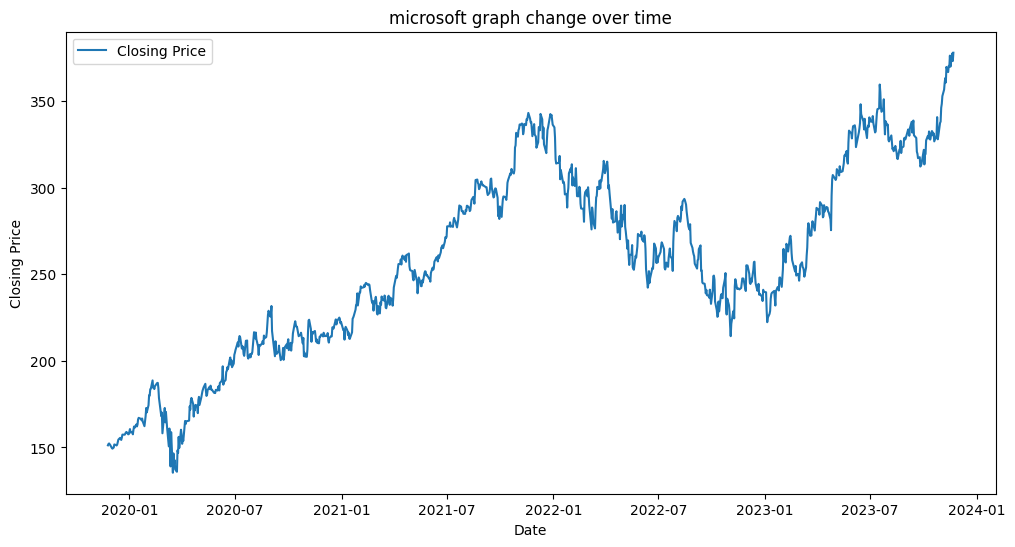

In [39]:
plotting_change_over_time(microsoft_df, "microsoft")

In [40]:

# Oh its time to check for missing values and outliers

print("microsoft missing values: ")
print(microsoft_df.isnull().sum())




microsoft missing values: 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<Axes: ylabel='Date'>

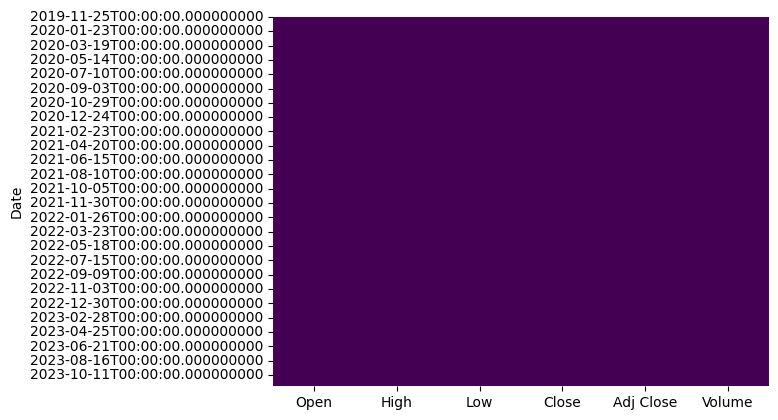

In [41]:
import seaborn as sns

sns.heatmap(microsoft_df.isnull(), cbar=False, cmap='viridis')


#we see from 2014->2023, the data is also totally clean

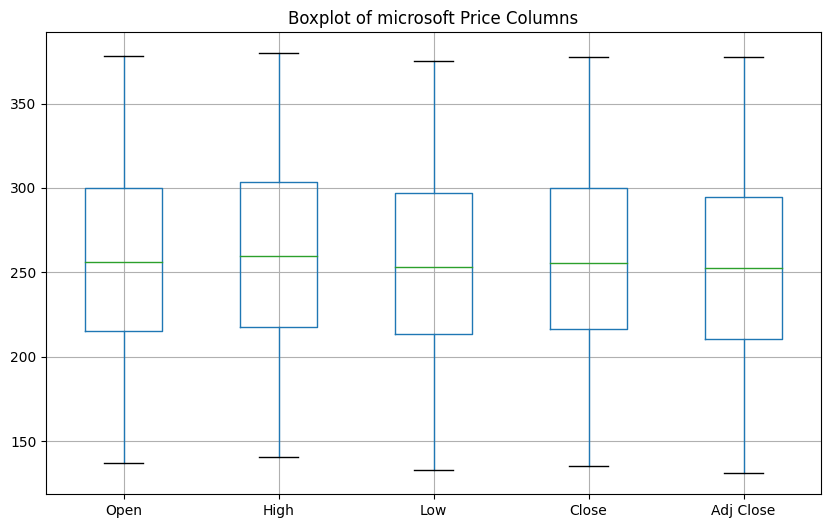

In [42]:
graph_outlier(microsoft_df, 'microsoft')

# there are some fluctuations here and there, but i dont think theres any serious outliers here

In [43]:

microsoft_data = microsoft_df['Close'].fillna(method='ffill')
microsoft_dataset = microsoft_data.values.reshape(-1, 1)

print(microsoft_dataset) #meta_dataset has the price of everything

print('length of microsoft_dataset: ', len(microsoft_dataset))

[[151.22999573]
 [152.02999878]
 [152.32000732]
 ...
 [377.44000244]
 [373.07000732]
 [377.8500061 ]]
length of microsoft_dataset:  1006


In [44]:
import math
microsoft_training_data_len = math.ceil(len(microsoft_dataset) * .8)

microsoft_training_data_len

805

In [45]:

microsoft_scaler = MinMaxScaler(feature_range=(0,1))

microsoft_scaler = microsoft_scaler.fit(microsoft_dataset)

microsoft_dataset = microsoft_scaler.transform(microsoft_dataset)



In [46]:
microsoft_dataset #after scaling the meta_dataset would be between 0-1

array([[0.06521469],
       [0.06851462],
       [0.06971088],
       ...,
       [0.99830878],
       [0.98028297],
       [1.        ]])

In [47]:

#now we generate
n_lookback = 120 #len of input sequences
n_forecast = 60 #len of prediction


microsoft_X = []
microsoft_Y = []

for i in range(n_lookback, len(microsoft_dataset) - n_forecast + 1):
    microsoft_X.append(microsoft_dataset[i - n_lookback: i])
    microsoft_Y.append(microsoft_dataset[i: i + n_forecast])

print(len(microsoft_X))
print(len(microsoft_Y))



827
827


In [48]:


microsoft_X = np.array(microsoft_X)
microsoft_Y = np.array(microsoft_Y)



In [49]:
print(microsoft_X.shape)
print(microsoft_Y.shape)

(827, 120, 1)
(827, 60, 1)


In [50]:
#now lets create the model

microsoft_model = Sequential()
microsoft_model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
microsoft_model.add(LSTM(units=50))
microsoft_model.add(Dense(n_forecast))

# adam = Adam(learning_rate = 5e-3)
microsoft_model.compile(loss='mean_squared_error', optimizer='adam')


In [51]:
print(microsoft_X.shape)
print(microsoft_Y.shape)

(827, 120, 1)
(827, 60, 1)


In [52]:
microsoft_training_size = int(microsoft_X.shape[0] * 0.8)
microsoft_training_size

661

In [53]:
microsoft_X_train, microsoft_y_train = microsoft_X[:microsoft_training_size], microsoft_Y[:microsoft_training_size]
microsoft_X_test, microsoft_y_test = microsoft_X[microsoft_training_size:], microsoft_Y[microsoft_training_size: ]

In [54]:
#now lets use the model

microsoft_history = microsoft_model.fit(microsoft_X_train, microsoft_y_train,
                            epochs = 100,
                            batch_size = 32,
                            validation_data = (microsoft_X_test, microsoft_y_test))

Epoch 1/100
21/21 [==============================] - 5s 52ms/step - loss: 0.1699 - val_loss: 0.1186
Epoch 2/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0244 - val_loss: 0.0220
Epoch 3/100
21/21 [==============================] - 0s 13ms/step - loss: 0.0086 - val_loss: 0.0191
Epoch 4/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0074 - val_loss: 0.0207
Epoch 5/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0071 - val_loss: 0.0251
Epoch 6/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0070 - val_loss: 0.0217
Epoch 7/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0069 - val_loss: 0.0229
Epoch 8/100
21/21 [==============================] - 0s 15ms/step - loss: 0.0067 - val_loss: 0.0254
Epoch 9/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0069 - val_loss: 0.0211
Epoch 10/100
21/21 [==============================] - 0s 14ms/step - loss: 0.0066 - val_loss: 0.0159

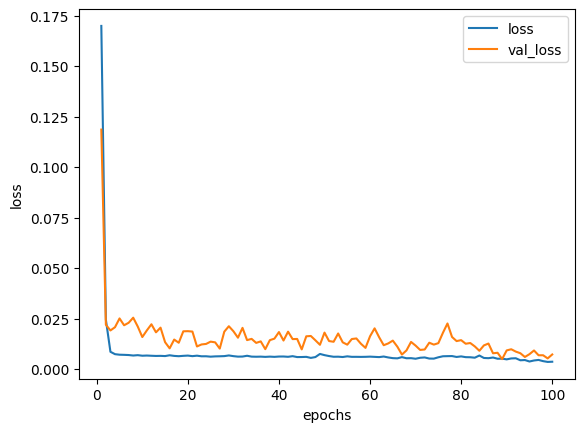

In [55]:
plotLossGraph(microsoft_history)

In [60]:
microsoft_lookback = microsoft_dataset[-n_lookback:]

microsoft_lookback = microsoft_lookback.reshape(1, n_lookback, 1)


In [61]:
microsoft_forecast = microsoft_model.predict(microsoft_lookback)
microsoft_forecast = microsoft_scaler.inverse_transform(microsoft_forecast)

1/1 [==============================] - 0s 23ms/step


In [62]:
microsoft_forecast

array([[377.46204, 376.2118 , 372.89117, 372.37527, 375.58395, 370.18048,
        364.43918, 368.08304, 369.42798, 370.23392, 363.333  , 357.12036,
        361.23407, 359.94022, 360.11633, 358.23837, 354.85977, 358.4865 ,
        349.59018, 354.46213, 355.31024, 353.7711 , 355.4335 , 347.95633,
        344.46082, 345.52032, 348.26428, 338.3467 , 344.83734, 338.51382,
        344.39798, 334.7266 , 344.89386, 338.96417, 343.6418 , 339.66437,
        341.05722, 344.04245, 344.1624 , 337.27377, 328.19492, 331.8387 ,
        329.6783 , 333.3929 , 329.7971 , 329.4593 , 321.86816, 331.2189 ,
        322.70108, 323.7514 , 324.5324 , 323.52588, 326.6539 , 319.90366,
        319.26007, 318.55606, 320.76868, 314.87057, 321.1947 , 313.9185 ]],
      dtype=float32)

In [63]:
import plotly.graph_objects as go

microsoft_past = microsoft_df[['Close']][-180:].reset_index()
microsoft_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
microsoft_past['Date'] = pd.to_datetime(microsoft_past['Date'])
microsoft_past['Forecast'] = np.nan
microsoft_past['Forecast'].iloc[-1] = microsoft_past['Actual'].iloc[-1]


microsoft_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
microsoft_future['Date'] = pd.date_range(start=microsoft_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
microsoft_future['Forecast'] = microsoft_forecast.flatten()
microsoft_future['Actual'] = np.nan

results = pd.concat([microsoft_past, microsoft_future]).set_index('Date')

# results = microsoft_past.append(microsoft_future).set_index('Date')

fig = px.line(results, x=results.index, y=['Actual', 'Forecast'], title='microsoft Forecasting in 2 months')
fig.add_shape(
    go.layout.Shape(
        type="line",
        x0=results.index[-n_forecast], y0=results['Actual'].min(),
        x1=results.index[-n_forecast], y1=results['Actual'].max(),
        line=dict(color="red", width=1, dash="dash")
    )
)
fig.show()


<ipython-input-63-ac7ff6b9f55c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
results.tail(n_forecast)

,Actual,Forecast
Date,,
2023-11-23,NaN,377.462036
2023-11-24,NaN,376.211792
2023-11-25,NaN,372.891174
2023-11-26,NaN,372.375275
2023-11-27,NaN,375.583954
2023-11-28,NaN,370.180481
2023-11-29,NaN,364.439178
2023-11-30,NaN,368.083038
2023-12-01,NaN,369.427979


In [65]:
results.shape
print("Price of microsoft on", results.index[-n_forecast], "should be ",results.Forecast[-n_forecast])

print("Price of microsoft on", results.index[-n_forecast + 7], "should be ",results.Forecast[-n_forecast + 7])


Price of microsoft on 2023-11-23 00:00:00 should be  377.4620361328125
Price of microsoft on 2023-11-30 00:00:00 should be  368.0830383300781


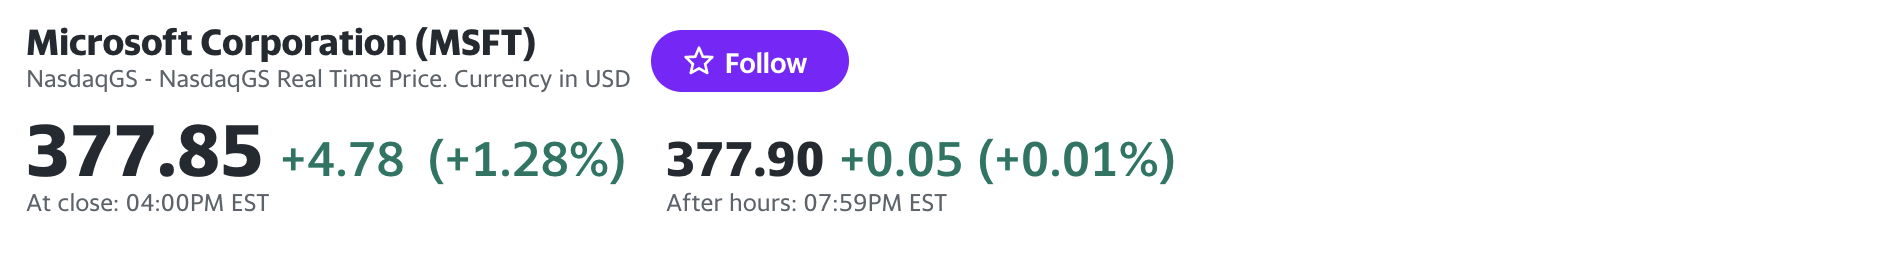

In [66]:
microsoft_model.save('microsoft.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.

